<a href="https://colab.research.google.com/github/kaustubhydv/Fletcher-Reeves-Conjugate-Gradient/blob/main/Fletcher_Reeve_Conjugate_Gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
from numpy.linalg import inv,det
import matplotlib.pyplot as plt
import copy
import matplotlib.pyplot as plt


epsilon = 10**-6
NUM_ITER = 15000
x_history = []


rho = 0.8
c = 0.1
alpha0 = 5

In [ ]:
def func(x_input):
    """
    --------------------------------------------------------
    Write your logic to evaluate the function value. 

    Input parameters:
        x: input column vector (a numpy array of n dimension)

    Returns:
        y : Value of the function given in the problem at x.
        
    --------------------------------------------------------
    """
    
    # Start your code here
    
    y = x_input[0]**2 + x_input[1]**2 + (0.5*x_input[0] + x_input[1])**2 + (0.5*x_input[0] + x_input[1])**4 
    #y =  (x_input[0]-1)**2 + (x_input[1]-1)**2 - x_input[0]*x_input[1]
    # End your code here
    
    return y

In [ ]:
def norm(vec):
  return (vec[0]**2 + vec[1]**2)**0.5

def del_f_delxj(f,j,x_star,h=0.001):
  ej = np.zeros(x_star.shape[0])
  ej[j] = 1
  return (f(x_star+h*ej) - f(x_star-h*ej))/(2*h)

def gradient(f,x_input):
  x_star = np.asarray(x_input)
  return np.asarray([del_f_delxj(f,j,x_star) for j in range(x_star.shape[0])])


def del2f_delxi2(f,x_star,i,delxi=0.001):
  x_starp = np.copy(x_star)
  x_starp[i] = x_starp[i] + delxi
  x_starm = np.copy(x_star)
  x_starm[i] = x_starm[i] - delxi
  return (f(x_starp)-2*f(x_star)+f(x_starm))/(delxi**2)
  

def del2f_delxixj(f,x_star,i,j,delxi=0.001,delxj=0.001):
  x_starA = np.copy(x_star)
  x_starA[i] += delxi
  x_starA[j] += delxj 
  
  x_starB = np.copy(x_star)
  x_starB[i] -= delxi
  x_starB[j] -= delxj 
  
  x_starC = np.copy(x_star)
  x_starC[i] -= delxi
  x_starC[j] += delxj 
  
  x_starD = np.copy(x_star)
  x_starD[i] += delxi
  x_starD[j] -= delxj 

  A = f(x_starA)
  B = f(x_starB)
  C = f(x_starC)
  D = f(x_starD)

  return (A+B-C-D)/(4*delxi*delxj)




def getAlpha(xk,func,alpha0,rho,c,pk):
  alpha = alpha0
  g = np.asarray(gradient(func,xk))
  #pk = -np.asarray(g)
  while (func(xk+ alpha*pk)) > func(xk) + alpha*c*np.dot(g,pk):
    alpha = rho*alpha
  return alpha

In [ ]:
def FRCG(func, x_initial):
    """
    -----------------------------------------------------------------------------------------------------------------------------
    Write your logic for FR-CG using in-exact line search. 

    Input parameters:  
        func : input function to be evaluated
        x_initial: initial value of x, a column vector (numpy array)

    Returns:
        x_output : converged x value, a column vector (numpy array)
        f_output : value of f at x_output
        grad_output : value of gradient at x_output, a column vector(numpy array)
    -----------------------------------------------------------------------------------------------------------------------------
    """
    
    # Start your code here

    x = x_initial.T[0]
    x_history.append(x)
    f = func(x)
    g = gradient(func,x)
    alpha0 = 5
    p = -gradient(func,x)
    k=0
    beta = None
    while norm(gradient(func,x_history[-1]))**2 > epsilon and k < NUM_ITER:
      alpha = getAlpha(x_history[-1],func,alpha0,rho,c,p)
      gradxk = gradient(func,x_history[-1])
      xk = x_history[-1] + alpha*p
      x_history.append(xk)
      grad_xk1 = gradient(func,x_history[-1])
      beta = np.dot(grad_xk1,grad_xk1)/np.dot(gradxk,gradxk)
      p = -gradient(func,x_history[-1]) + beta*p 
      k += 1
    # End your code here
    
    if k==NUM_ITER:
      print('Maximum iterations reached but convergence did not happen \n')
    
    x_output = np.asarray([x_history[-1]]).T
    f_output = func(x_output)
    grad_output = np.asarray([gradient(func,x_history[-1])]).T

    print(x_output, f_output, grad_output)
    return x_output, f_output, grad_output.T




In [ ]:

x_initial = np.array([[1.5, 1.5]]).T
x_output, f_output, grad_output = FRCG(func, x_initial)


[[ 0.00027155]
 [-0.00018297]] [1.0944655e-07] [[ 0.00049591]
 [-0.00046034]]


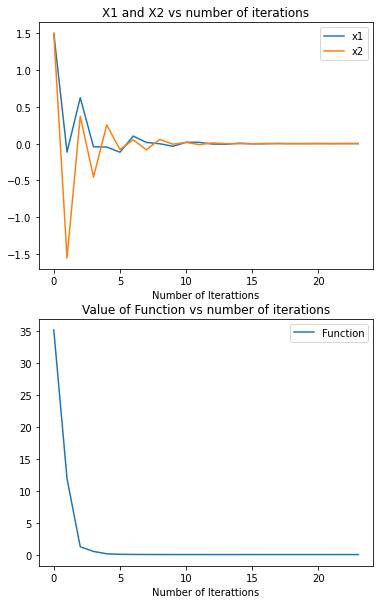

In [ ]:
fig, axis = plt.subplots(2, 1)
fig.set_figheight(10)
fig.set_figwidth(6)
x1 = [x[0] for x in x_history]
x2 = [x[1] for x in x_history]
f = [func(x) for x in x_history ]
axis[0].plot(x1,label='x1')
axis[0].plot(x2,label='x2')
axis[0].set_xlabel('Number of Iterattions')
axis[0].set_title('X1 and X2 vs number of iterations')
axis[0].legend()

axis[1].set_xlabel('Number of Iterattions')
axis[1].set_title('Value of Function vs number of iterations')
axis[1].plot(f,label='Function')
axis[1].legend()
plt.show()

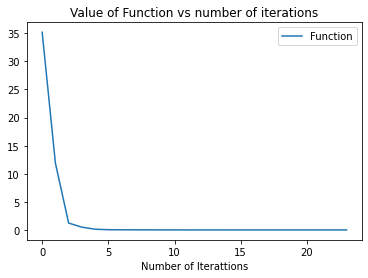